This notebook forms your second coursework CA2.  Marks will be awarded for each key task performed.  The maximum marks for each task given next to the task.  On plots, for full marks remember to label all axes correctly including the units.  

For section 3, you can copy code from the first week Colab notebook if needed.

## **DO NOT COPY EACH OTHERS CODE as this will be treated as plagarism.**

This is obvious, but make sure you RUN all the cells (except where instructed not to, e.g. if a written answer is required).  If the output of the cell is not shown it will cost you marks.

You can use more than one cell for your answer if needed.  Just add a cell by hovering your cursor at the bottom of the preceding cell and clicking on + Code.

When you have finished go to File (upper left) and select print and choose "save as pdf".  This should then download the notebook with all your answers in pdf format. Check the pdf to make sure all the answers are visible.  Submit the pdf file via Turnitin on Learning Central before the deadline.


In [45]:
!pip install pytransit celerite emcee corner

# Section 1 (7 marks)

Import these Python packages.

YOU MAY NEED TO RE-IMPORT THESE IF YOU SAVE AND RETURN TO THE NOTEBOOK

In [46]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import matplotlib
matplotlib.rcParams['axes.formatter.useoffset'] = False
from astropy import units as u
from astropy import constants as const
import warnings
warnings.filterwarnings('ignore')

Add this function that models the Planck function or law.  The wavelength grid (wl) must be in microns and the temperature (T) must be in K.  wl will be a 1-D numpy array.  The output specific intensity is in units of W/m$^2$/ micron/sr.  

YOU MAY NEED TO RE-IMPORT THIS IF YOU SAVE AND RETURN TO THE NOTEBOOK

In [47]:
def planck(wl, T):
  """ Planck function.
    Parameters
    __________
      wl : 			array
				wavelength [micron]
      T : 			scalar
				Temperature [K]
    Returns
    -------
      spectrum:			array
				The Planck spectrum  [W m^-2 sr^-2 micron^-1]
  """
  a = np.float64(1.191042768e8)
  b = np.float64(14387.7516)
  try:
    x = b/(wl*T)
    bb = a/wl**5 / (np.exp(x) - 1.0)
  except ArithmeticError:
    bb = np.zeros(np.size(wl))
  return bb

<center>

|Planet|R_p (Rjup)|M_p (Mjup)|T_p (K)|R_s (Rsun)|T_s (K)|Period (days)|semi-major axis a (AU)|inclination (deg)
|-|-|-|-|-|-|-|-|-|
|Kepler-412 b|1.341|0.941|1850|1.29|5750|1.7208604|0.02897|80.559

</center>

The Planck function gives the specific intensity for given wavelength, $B(λ, T)$.  It is temperature dependent.  Plot the the Planck function (i.e. specific intensity) versus wavelength for your chosen planet.   Limit the wavelength range to between 1 and 10 microns.  **In this and all other plots label your axes and indicate the correct units. **

(2 marks)

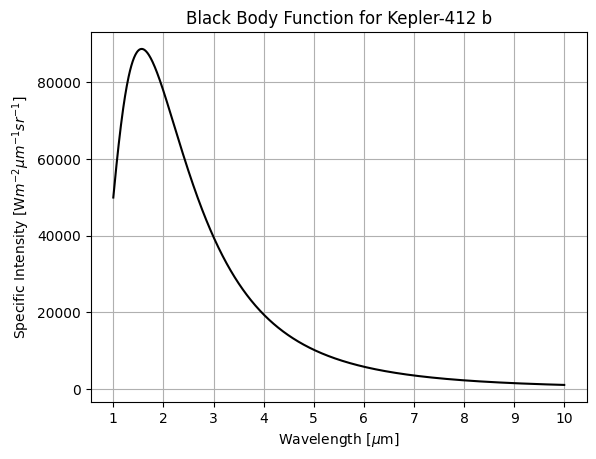

In [48]:
laMbda = np.linspace(1, 10, 1000) # defining wavelength range in microns
x = np.linspace(1, 10, 10) # ticks for x label
T_p = 1850 # Temperature of Kepler-412 b

BB_p = planck(laMbda, T_p) # runs the planck function defined above with the parameters defined here

plt.plot(laMbda, BB_p, 'k-') # The plot of this BB
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Specific Intensity [W$m^{-2}\mu m^{-1}sr^{-1}$]')
plt.title('Black Body Function for Kepler-412 b')
plt.grid(True)
plt.xticks(x)
plt.show()

Now plot the Planck function of the host star over the same wavelength range.  

(2 marks)

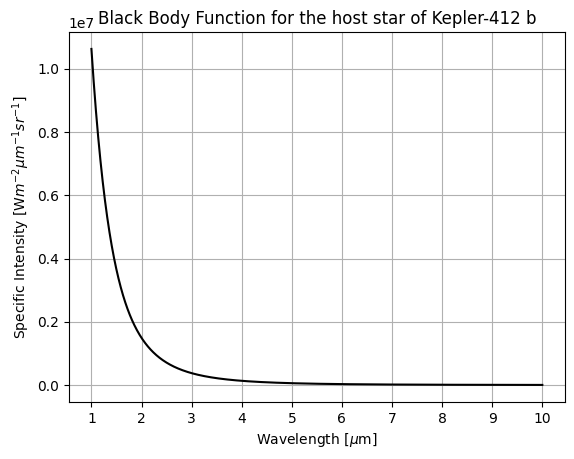

In [49]:
# laMbda is alreadyu defined above and will be reused
T_s = 5750 # temperature of host star

BB_s = planck(laMbda, T_s)

plt.plot(laMbda, BB_s, 'k-') # The plot of this BB
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('Specific Intensity [W$m^{-2}\mu m^{-1}sr^{-1}$]')
plt.title('Black Body Function for the host star of Kepler-412 b')
plt.grid(True)
plt.xticks(x)
plt.show()
# It would be better to plot this over a smaller wavelength range to see the form of the BB.

Now plot the **ratio of** the planet Planck function multiplied by the planet surface area **to** the star Planck function multiplied by the star surface area, **from 1 to 10 microns**.  

(2 marks)

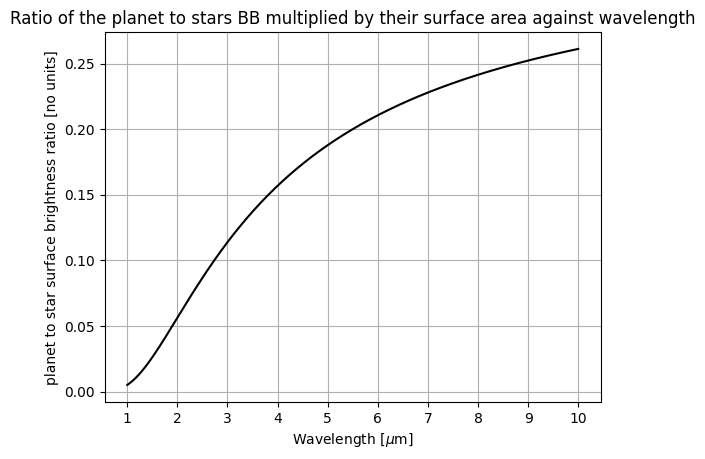

In [50]:
# surface area of planet
R_p = 1.341 * u.Rjup
Sigma_p = np.pi*(R_p)**2

#surface area of host star
R_s = 1.29 * u.Rsun
Sigma_s = np.pi*(R_s)**2

ratio = (BB_p * Sigma_p) / (BB_s * Sigma_s)
# wavelength is stil laMbda

plt.plot(laMbda, ratio, 'k-')
plt.xlabel('Wavelength [$\mu$m]')
plt.ylabel('planet to star surface brightness ratio [no units]')
plt.title('Ratio of the planet to stars BB multiplied by their surface area against wavelength')
plt.grid(True)
plt.xticks(x)
plt.show()

Ignoring the lack of any absorption features, what kind of exoplanet spectrum does the last plot approximate.  Write down the answer in the cell below. DO NOT RUN THIS CELL.

(1 mark)

**The ratio of the surface areas reduces to $\frac{{R_p}^{2}}{{R_s}^{2}}$ which is the fractional transit dip.**

**Answer:**

**Day-side emission (secondary eclipse) spectroscopy of the gas giant Kepler-412 b - Reasoning comes from Figure 1 on the left in the Spectroscopy Supplement document. The spectra takes the same shape**






# Section 2 (15 marks)

You will now calculate the pressure scale height for your chosen planet.  First you will test your code by calculating the Earth's scale height H.

Define the variables Rp and Mp for the planet radius and mass, and make them equal to the **radius of the Earth in m** and the **mass of the Earth in kg** respectively.

(1 mark)

In [51]:
Re = 1 * u.Rearth.to(u.m) * u.m # radius of planet
Me = 1 * u.Mearth.to(u.kg) * u.kg # mass of planet

In [52]:
u.Rearth.to(u.m)

6378100.0

Now write a piece of code to calculate the surface gravity, g, of a planet of radius Rp and mass Mp.  Then print the result.
You are given the gravitational constant.

(2 marks)


In [53]:
G = const.G # essentially the same as it was before but with units

g_e = (G*Me) / (Re**2)

print ("{:.3f}".format(g_e)) # This is approximately 9.8 which is what we would expect

9.798 m / s2


Does this match the value for the Earth?  **If not go back and check your code again.**

In the code below define a variable mu, for the mean molecular weight of the atmosphere making it equal to the Earth's atmosphere's mean molecular weight in units of atomic mass unit (amu) multiplied by the mass of a proton 1.67262192 × 10$^{-27}$ kilograms.

(1 mark)

In [54]:
mmw_e = 28.97 # see below for source # This is 29 amu from the notes
mu_e = mmw_e * 1.67262192e-27 * u.kg

**Link to mean molecular weight assumption: https://nssdc.gsfc.nasa.gov/planetary/factsheet/earthfact.html**

Assume the temperature of the Earth's atmosphere, T, is 288 K.  Write the code to calculate the scale height H in terms of k (Boltzamann's constant), T, mu and g.  Print the result.  

(2 marks)

In [55]:
T_e = 288 * u.K

k = const.k_B.decompose()

H_e = (k*T_e) / (mu_e*g_e)

print ("{:.3f}".format(H_e))

8374.799 m


Is this close to the expected scale height for the Earth?  If not go back and check your calculation and code.

Next take your chosen exoplanet and calculate its pressure scale height.  Write all your code in the cell below and print out the value for H.  You should change the mean molecular weight to 2.4 amu (multiplied by proton mass) as your planet is a gas giant.

(4 marks)  

In [56]:
R_kplr = 1.341 * u.Rjup.to(u.m) * u.m # radius of planet
M_kplr = 0.941 * u.Mjup.to(u.kg) * u.kg # mass of planet

g_kplr = (G*M_kplr) / (R_kplr**2)

print ("{:.3f}".format(g_kplr))

mmw_kplr = 2.4 # see below for source # This is 29 amu from the notes
mu_kplr = mmw_kplr * 1.67262192e-27 * u.kg

T_kplr = 1850 * u.K
# boltsman constant defined previously

H_kplr = (k*T_kplr) / (mu_kplr*g_kplr)

print ("{:.3f}".format(H_kplr))

12.970 m / s2
490567.045 m


Assuming a typical spectral feature results in an atmospheric annulus with effective height $5H$ (where $H$ is the scale height), for your chosen planet find the fractional transit depth $A_p$ due to the spectral feature.   Use $A_p=2(5HR_p)/R_s^2$.  Write your code below, and print the answer in **parts per million (ppm)**.

(1 mark)

In [57]:
R_s = 1.29 * u.Rsun.to(u.m) * u.m

Ap = (2*(5*H_kplr*R_kplr)) / ((R_s)**2)
Ap = Ap * 1e6 # parts per million conversion

print (Ap) #answer must be in ppm

583.9305100340591


What factors result in high amplitude spectral features?  Write your answer in the cell below.  DO NOT RUN THIS CELL.  

(4 marks)

**Answer:**

**If the radius of the host star were to decrease the amplitude spectral features would increase.**

**If the radius of the planet were to increase the amplitude spectral features would increase.**

**If the Temperature of the planet were to iuncrease the amplitude spectral features would increase.**

**If the mean molecular weight of the planets atmosphere decreases the amplitude spectral features would increase.**

**Thus, a large hot planet with an atmosphere of mostly H and He surrounded by a small star would produce the largest amplitude spectral features. This is our hot Jupiter surrounding an M-Dwarf.**

# Section 3 (10 marks)

Next generate and plot a primary transit light curve for your planet.  Do not add any noise.

You can re-use code from the week 1 Colab notebook to do this.  You must show all the steps and code needed. **You can use as many or as few cells as needed**.

You can assume the eccentricity of the orbit is zero and the argument of periastron is 90 degrees. Assume a quadratic limb darkening law  with gamma = [0.28, 0.01].

For other parameters use the information given about your chosen planet.

Tailor your time grid to show approximately an equal amount of time out-of-transit as in transit (i.e. 1/2 T14 before the transit and 1/2 T14 after the transit, where T14 is the transit duration).

As always make sure to label the axes correctly.

(10 marks)

In [58]:
from pytransit import QuadraticModel
from scipy.optimize import minimize

In [59]:
i = 80.559 * u.deg    # inclination in degrees
a = 0.02897 * u.AU    # semi major axis in AU
P = 1.7208604 * u.day # period in days

In [60]:
t0 = 0.                               # time of inferior conjunction in days
per = (P).value                       # orbital period in days
rp_rs = (R_kplr / R_s).value          # planet radius / stellar radius ratio
ars = ((a.to(u.m)*u.m) / R_s).value   # semi-major axis / stellar radius ratio
inc = (i).to(u.rad).value             # orbital inclination (in radians)
ecc = 0.                              # eccentricity
w = (90*u.deg).to(u.rad).value        # longitude of periastron (in radians)
gamma = [0.28, 0.01]                  # limb darkening coefficients [u1, u2]
t = np.linspace(-0.05, 0.05, 1000)    # times at which to calculate light curve (days)

In [61]:
tm = QuadraticModel() # a model that uses two limb-darkening coefficients
tm.set_data(t)

lc = tm.evaluate(k=rp_rs, ldc=gamma, t0=t0, p=per, a=ars, i=inc, e=ecc, w=w)
duration = t[lc < 1] # The array of time values for which the planet is in transit
T14 = (max(duration) - min(duration)) * u.day # the max minus the min gives the change in time which is T14
print("The transit duration, T14, is {:.3f}".format(T14.value),"days")

The transit duration, T14, is 0.089 days


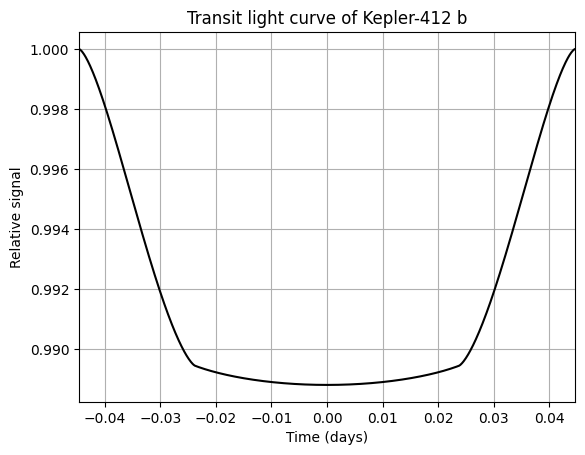

In [62]:
plt.figure('lc')
plt.plot(t, lc, 'k-')
plt.grid(True)
plt.ylabel('Relative signal')
plt.xlabel('Time (days)')
plt.title('Transit light curve of Kepler-412 b')
plt.xlim(-T14.value / 2, T14.value / 2) # plotted for the transit duration width
plt.show()

# Section 4 (18 marks)

Upload the water cross-section file, xsec.txt, to the sample_data folder.  The first row in the file is wavelength in microns and the second row is water absorption cross-section in cm$^2$, which we convert to m$^2$ next.

In [63]:
!wget https://raw.githubusercontent.com/Huw-Riley/Exoplanets/main/xsec.txt

--2024-03-22 10:57:32--  https://raw.githubusercontent.com/Huw-Riley/Exoplanets/main/xsec.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.111.133, 185.199.110.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.111.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2246900 (2.1M) [text/plain]
Saving to: ‘xsec.txt.1’

xsec.txt.1          100%[===================>]   2.14M  9.19MB/s    in 0.2s    

2024-03-22 10:57:33 (9.19 MB/s) - ‘xsec.txt.1’ saved [2246900/2246900]



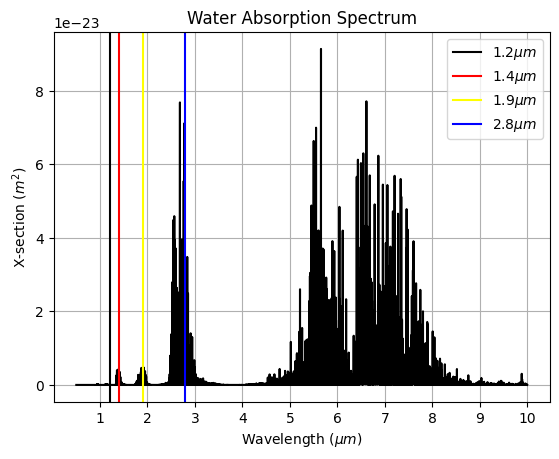

In [64]:
xsec_file = np.loadtxt('xsec.txt')
wl = xsec_file[0]
xsec = xsec_file[1]
xsec = xsec*0.0001 #convert to m^2
plt.figure('x-section')
plt.plot(wl, xsec, 'k-')
plt.axvline(1.2, color='black', label='1.2$\mu m$')
plt.axvline(1.4, color='red', label='1.4$\mu m$')
plt.axvline(1.9, color='yellow', label='1.9$\mu m$')
plt.axvline(2.8, color='blue', label='2.8$\mu m$')
plt.xlabel('Wavelength ($\mu m$)')
plt.ylabel('X-section ($m^2$)')
plt.title('Water Absorption Spectrum')
plt.legend(loc='best')
plt.grid(True)
plt.xticks(x)
plt.show()

What kind of quantized energy state transitions are represented by these lines (in the infra-red)? Write your answer below. DO NOT RUN THIS CELL.

(1 mark)

**Answers:**

**$H_2O$ absorbs in the infrared due to rovibrational transitions - https://arxiv.org/pdf/1904.03190.pdf**

**Vibrational transitions also occur in the infrared range. I could not find evidence for it but I believe that the absorption features at around 5.5$\mu m$ and 7$\mu m$ are due to vibrational transitions. Either this or they are rovibrational transitions not stated by [1]**

**From [1] Fig 21b, 4 peaks can be seen due to rovibrational transitions. These peaks are at approximately: 1.2$\mu m$, 1.4$\mu m$, 1.9$\mu m$ and 2.8$\mu m$.**

**[1] - Tinetti G, Encrenaz T, Coustenis A. Spectroscopy of planetary atmospheres in our Galaxy. The Astronomy and Astrophysics Review. 2013 Nov;21:1-65.**

**The 1.4 micron line shown by the black line shows Rayleigh scattering in the clouds of atmospheres, which is why it appears smaller in amplitude. This may be the same for the 1.9 micron absorption also. - https://arxiv.org/pdf/1512.04341.pdf**

Consider a planet with radius and mass exactly equal to those of Neptune but with an isothermal atmosphere of temperature 800 K.  

In [65]:
T_Nep = 800 * u.K

Define Rp and Mp and then calculate in the cell below the surface gravity, g, and the scale height, H.  Assume a mean molecular weight of 2.4 amu (multiplied by the mass of a proton).  Print out g and H in SI units.

(3 marks)

In [66]:
R_Nep = 24764e3 * u.m
M_Nep = 102.409e24 * u.kg

Mass and radius from - https://nssdc.gsfc.nasa.gov/planetary/factsheet/neptunefact.html

In [67]:
# Gravotatoonal constant defined
g_Nep = (G*M_Nep) / (R_Nep**2)

# boltsman constant defined above
mu_Nep = (2.4 * 1.67262192e-27) * u.kg

H_Nep = (k*T_Nep) / (mu_Nep*g_Nep)

print ("{:.3f}".format(g_Nep))
print ("{:.3f}".format(H_Nep))

11.146 m / s2
246866.401 m


**This value is not consistent with the true scale height of Neptune because the isothermal temperature we have chosen is far too hot. The true isothermal temperature would be closer to the BB temperature, which is 46K from the factsheet above. This temperature yeilds 14km which is closer to the accepted valuye of (19-20)km**

We will define a height array, z, extending from 0 to 10000 km above the radius of the planet.  We will divide the atmosphere into 1000 layers.

In [68]:
n_layer = 1000
z = np.linspace(0, 10000000, n_layer) * u.m

We will assume the radius corresponds to the 1 bar pressure level (1 bar = 100000 Pa).   Write down an expression (in code of course) for the pressure in Pa at a height z above the 1 bar level. Then show a plot of p vs z (**not** z vs p)

(2 marks)

$$P(z)=P_0e^{\frac{-z}{H}}$$

The radius corresponds to 1 bar.

In [69]:
P_0 = 100000 * u.Pa
P_z = P_0*np.exp(-z.value / H_Nep.value)

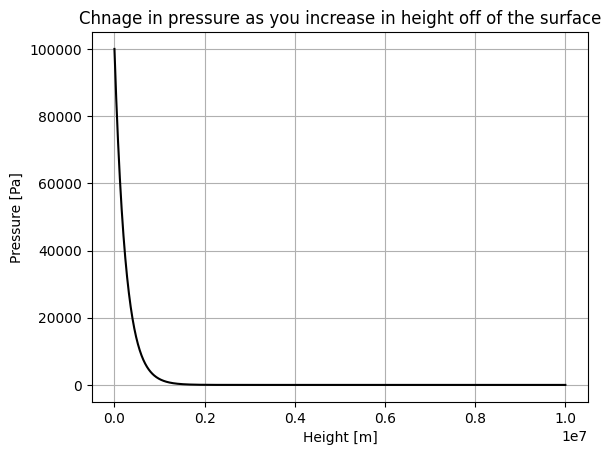

In [70]:
plt.plot(z.value, P_z.value, 'k-')
plt.xlabel('Height [m]')
plt.ylabel('Pressure [Pa]')
plt.title('Chnage in pressure as you increase in height off of the surface')
plt.grid(True)
plt.show()

**It seems like the z range was a bit excessive as the pressure went to zero at around 2000km**

We will say the VMR of water is 0.005 in this atmosphere.  Apart from water there are just the fill gases H$_2$ and He.

**Using a mean molecular weight of 2.4 only accounts for H and He, not water. This means that the scale height used below to calculate the model of the spectra is not correct.**

In [71]:
VMR = 0.005

In the cell below write down an expression to obtain the number density n of water in terms of its VMR, the total pressure, p, the temperature T and Boltzmann's constant k.  Then plot n vs z.

(2 marks)




$$PV=nkT$$

$$n_{H_2O}=\frac{N_AP}{RT}C_{H_2O}$$

Where $C_{H_2O}$ is the volume mixing ratio. From equation 1.7 - https://projects.iq.harvard.edu/files/acmg/files/intro_atmo_chem_bookchap1.pdf

$$R=k_BN_A$$

Which gives

$$n_{H_2O}=\frac{P}{k_BT}C_{H_2O}$$

In [72]:
n = (P_z.decompose()*VMR) / (k*T_Nep)

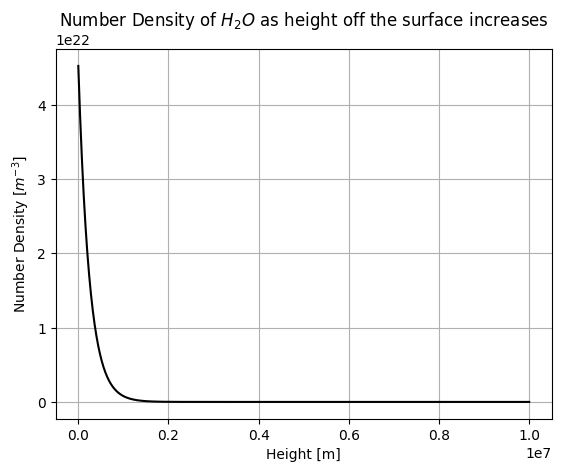

In [73]:
plt.plot(z.value, n.value, 'k-')
plt.xlabel('Height [m]')
plt.ylabel('Number Density [$m^{-3}$]')
plt.title('Number Density of $H_2O$ as height off the surface increases')
plt.grid(True)
plt.show()

**It appears that the planet gets less dense as you approach the edge of the atmosphere as expected.**

Below you will see the expression for the hydrostatic isothermal approximation for tau, the optical depth for a chord traversing an atmosphere at height z.  Note this is actually τ(z, λ) as it is wavelength dependent due to xsec and so will be a 2-D array.

In [74]:
tau = np.zeros((len(z), len(wl)))
for i in range(tau.shape[0]):
  tau[i] = xsec*VMR*n[0]*np.exp(-z[i]/H_Nep)*np.sqrt(2*np.pi*R_Nep*H_Nep) # the n[0] is correct and not a typo

Make an empty (zero-values) 2-D numpy array with a size (rows and columns) matching the tau array.

This is your annulus area array where each position in the array gives the effective area of an atmospheric annulus at height z and wavelength λ.  

Calculate the true annulus area at each height z.  Then find the effective annulus area at height z and wavelength λ, where the effective area is the true annulus area x $[1-e^{-\tau(z,λ)}]$.

Populate the annulus area array with the effective annulus area for each z and λ.

Next sum the annulus area array down each column, i.e. for each wavelength, obtaining a 1-D array of total atmospheric effective area vs wavelength.

Plot the total effective atmospheric area vs wavelength.

(6 marks)

In [82]:
columns = [len(a) for a in tau] # length of each array in tuple
row = len(columns) # number of arrays in tuple
column = columns[0] # all arrays have the same length
radius = np.zeros((row, column)) # 2D array at to contain the radius

In [76]:
for i in range(row):
  radius[i] = z[i] + R_Nep # makes each array the true radius of the planet

$$A=\int_{z[i-1]}^{z[i]}2\pi{}R\,dz$$

In [77]:
# each anulus will have the same width. So the width can be given as z[i] - z[i-1]
# The circumference has an infinitesimal depth - this is the approximation made here
# If you use the normal annulus formula you end up with 1 (999 instead of 1000) too few values in the array
# These areas are not at the correct radius for tau.
area = np.zeros(column)
for j in range(row):
  A = (2*np.pi*radius[j, :]*(z[1]-z[0])).value
  area = np.vstack((area, A))
area = np.delete(area, 0, axis=0)

In [78]:
A_eff = area * (1 - np.exp(-tau))
A_eff_1D = np.sum(A_eff, axis=0)

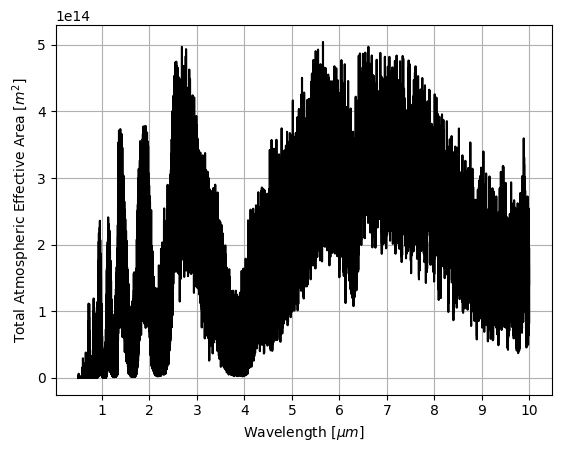

In [79]:
plt.plot(wl, A_eff_1D, 'k-')
plt.xlabel('Wavelength [$\mu m$]')
plt.ylabel('Total Atmospheric Effective Area [$m^2$]')
plt.grid(True)
plt.xticks(x)
plt.show()

Next add the area of the disc of the planet to the total atmospheric area at each wavelength.

Divide the result by the area of the disc of the star to obtain a final result.  Assume the star has a radius exactly equal to **half that of our Sun**.

Now plot the final result vs wavelength.

(3 marks)


In [80]:
R_star = 0.5 * u.R_sun
Result = (A_eff_1D + (np.pi*(R_Nep.value)**2)) / (np.pi*(R_star.to(u.m).value)**2)

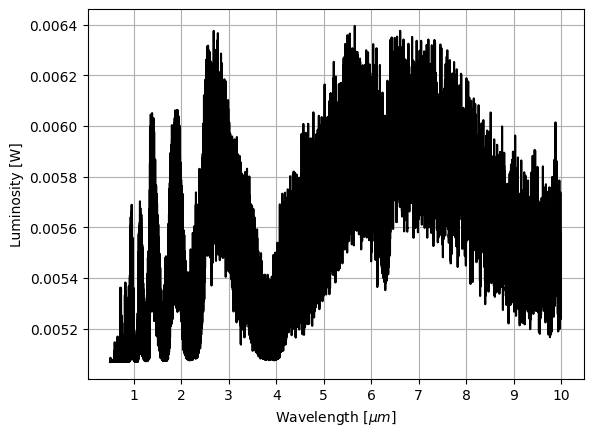

In [81]:
plt.plot(wl, Result, 'k-')
plt.xlabel('Wavelength [$\mu m$]')
plt.ylabel('Luminosity [W]')
plt.xticks(x)
plt.grid(True)
plt.show()

What kind of spectrum have you just modelled? Write your answer in the cell below.  DO NOT RUN THIS CELL

(1 mark)

**Answer:**

**Absorption Spectrum**

The end.